In [6]:
import pandas as pd
data = pd.read_csv('Project datasets/Sample files/train_outputs_50.csv', header=None)

In [7]:
# Drop the last row to make it 49 rows so that we can make a 7x7 image
df = data.iloc[:49]

# Verify the shape
print("Data shape after trimming:", df.shape)  # Should output (49, number_of_columns)

Data shape after trimming: (49, 500)


In [8]:
from sklearn.preprocessing import StandardScaler

# Normalize each spectrum
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

In [14]:
# Dimensionality reduction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=49)  # or use t-SNE for better visualization
reduced_data = pca.fit_transform(normalized_data)

In [15]:
# Clustering
from sklearn.cluster import KMeans
n_clusters = 10  # You can choose this based on how granular you want the grouping
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(reduced_data)

In [19]:
len(labels)

49

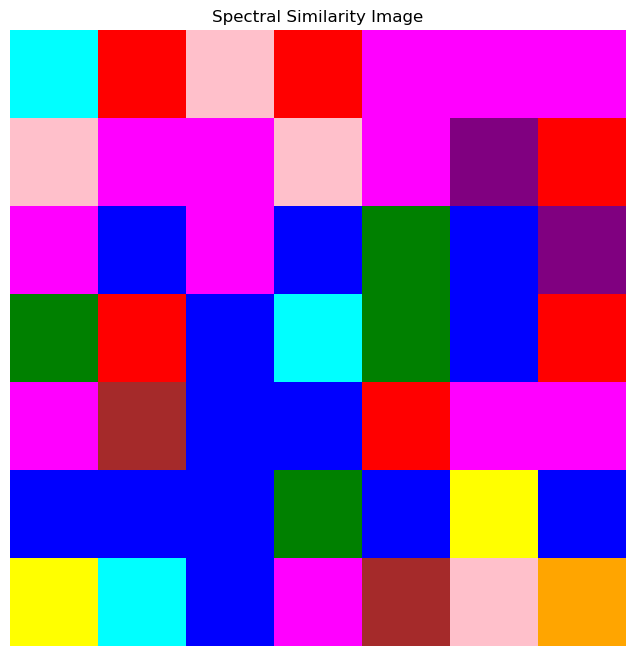

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Define color names and map them to RGBA values
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
rgba_colors = [mcolors.to_rgba(color) for color in colors]

# Map cluster labels to RGBA colors
color_map = [rgba_colors[label] for label in labels]  # Replace `labels` with your cluster labels

# Convert color_map to a Numpy array and reshape to the desired grid (7x7)
grid_size = 7
color_grid = np.array(color_map).reshape((grid_size, grid_size, 4))  # 4 for RGBA channels

# Plot the color-coded similarity image
plt.figure(figsize=(8, 8))
plt.imshow(color_grid, interpolation='nearest')
plt.axis('off')
plt.title("Spectral Similarity Image")
plt.show()

#### Another approach: Use DBSCAN for clustering so that we don't have to specify cluster numbers

In [49]:
# What we've done so far:

# Normalize each spectrum
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)
# Dimensionality reduction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)  # or use t-SNE for better visualization
reduced_data = pca.fit_transform(normalized_data)

In [65]:
# Apply DBSCAN for clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4, min_samples=10)  # Adjust 'eps' and 'min_samples' as needed
labels = dbscan.fit_predict(reduced_data)

In [66]:
# Convert labels to a 7x7 grid format (assuming 49 rows after filtering)
grid_size = 7
grid_labels = np.array(labels[:49]).reshape((grid_size, grid_size))

In [67]:
# Replace any noise points (-1) with a separate label or color them as a distinct cluster
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

In [68]:
# Create an interactive heatmap with Plotly
import plotly.express as px
fig = px.imshow(grid_labels, color_continuous_scale='Viridis', 
                title="Spectral Similarity Image (DBSCAN Clustering)")

In [69]:
# Add axis labels and titles
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis_colorbar=dict(title="Cluster"))

# Show the Plotly figure
fig.show()